In [13]:
# imports
import networkx as nx
import matplotlib as plt

G = nx.Graph()
L1 = [1]
L2 = [x for x in range(2,12)]
L3 = [x for x in range(12,112)]
L4 = [x for x in range(112,1112)]

G.add_node(1)
G.add_nodes_from(L1)
G.add_nodes_from(L2)
G.add_nodes_from(L3)
G.add_nodes_from(L4)
G

In [14]:
# import networkx as nx
# G = nx.Graph()
# L1 = [1]
# L2 = [x for x in range(2,12)]
# L3 = [x for x in range(12,112)]
# L4 = [x for x in range(112,1112)]
#
#
# G.add_node(1)
# G.add_nodes_from(L1)
# G.add_nodes_from(L2)
# G.add_nodes_from(L3)
# G.add_nodes_from(L4)
# G.add_edges_from([(x,y) for x in L1 for y in L2])
# temp2 = []
# temp = []
# temp2.extend(L4)
# temp.extend(L3)
# for i in range(1,11,1):
#     G.add_edges_from([x,temp.pop()] for x in L2)
#     G.add_edges_from([y,temp2.pop()] for y in L3)
#
# print (G.nodes())
# print (G.edges())
# print (G.number_of_nodes())
# print (G.number_of_edges())
# print (G.neighbors(1))
#
# try:
#     diameter_of_myGraph =nx.shortest_path_length(G)
#     #print diameter_of_myGraph
# except nx.NetworkXNoPath:
#     print ('No path')
#
# try:
#     avg_distance_of_myGraph =nx.average_shortest_path_length(G)
#     print (avg_distance_of_myGraph)
# except nx.NetworkXNoPath:
#     print ('No path')

TypeError: 'module' object is not callable

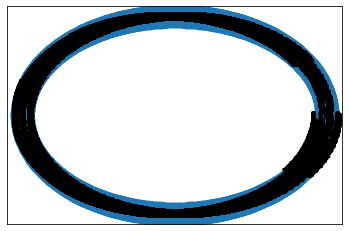

In [15]:
# Drawing the graph
options = {
    # Some configurations
    # 'node_color': ['blue', 'red', 'green'],
    # "node_color": "black",
    # 'width': 5,

    # BASIC CONFIGURATION
    'node_size': 500,
    'pos': nx.kamada_kawai_layout(G),
    'with_labels': True,
    'font_weight': 'bold',
    'connectionstyle': 'arc3,rad=0.4',

    # HIGH CONTRAST
    # "font_size": 36,
    # "node_size": 3000,
    # "node_color": "white",
    # "edgecolors": "black",
    # "linewidths": 5,
    # "width": 5,
}
# nx.draw_networkx(o_graph, pos=nx.kamada_kawai_layout(o_graph), with_labels=True, font_weight='bold',
# connectionstyle="arc3,rad=0.4")
nx.draw_networkx(G, **options)
plt.axis('off')
# if save_graph:
#     plt.savefig(path_graph + '_network_model.eps', format='eps')
# if show_graph:
#     plt.show()

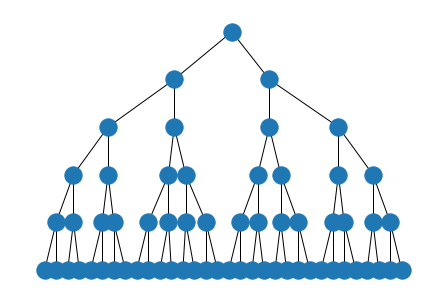

<Figure size 1600x800 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.generators.balanced_tree(2, 5)
pos = graphviz_layout(T, prog="dot")
pos

aux_pos ={}
for key in pos.keys():
    aux_pos[int(key)] = pos[key]
pos = aux_pos
nx.draw(T, pos)

plt.figure(figsize=(20,10), dpi=80)
plt.show()

In [51]:
import networkx as nx
import random


def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.
    Licensed under Creative Commons Attribution-Share Alike

    If the graph is a tree this will return the positions to plot this in a
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch
    - if the tree is directed and this is not given,
      the root will be found and used
    - if the tree is directed and this is given, then
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given,
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children)!=0:
            dx = width/len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap,
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [54]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.Graph()
G.add_edges_from([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10),
                  (5,11), (5,12), (6,13)])
pos = hierarchy_pos(G,1)
pos
# nx.draw(G, pos=pos, with_labels=True)
# plt.savefig('hierarchy.png')

{1: (0.5, 0),
 2: (0.16666666666666666, -0.2),
 5: (0.05555555555555555, -0.4),
 11: (0.027777777777777776, -0.6000000000000001),
 12: (0.08333333333333333, -0.6000000000000001),
 6: (0.16666666666666666, -0.4),
 13: (0.16666666666666666, -0.6000000000000001),
 7: (0.2777777777777778, -0.4),
 3: (0.5, -0.2),
 8: (0.41666666666666674, -0.4),
 9: (0.5833333333333334, -0.4),
 4: (0.8333333333333333, -0.2),
 10: (0.8333333333333333, -0.4)}